In [1]:
## check availability of GPU (nvidia-smi)
import os
os.environ["CUDA_VISIBLE_DEVICES"]="5"

In [2]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla V100-SXM2-32GB, compute capability 7.0


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os 
import glob

current_dir = "/mnt/akoustos/"

data_dir = current_dir + "Data/"
labeled_data_dir = data_dir + 'Labeled_Data/'
audio_dir = data_dir + "Raw_Audio/"

spectrogram_dir = data_dir + "Extracted_Spectrogram/"
if not os.path.exists(spectrogram_dir):
    os.makedirs(spectrogram_dir)


In [4]:
from src.data_split import Data_Split
data = Data_Split.data_split_allclasses(spectrogram_dir)
print(data.head(10))

  label  Count  Percentage
0    14    500       21.83
1    25    500       21.83
2  2662    407       17.77
3  4949    501       21.88
4  5620    382       16.68
Size of train, val, test dataset: 1602 344 344
Percentage of train, val, test dataset: 70.0% 15.0% 15.0%
                                            filename label  split
0  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  5620  train
1  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  4949  train
2  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  5620  train
3  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  2662  train
4  /mnt/akoustos/Data/Extracted_Spectrogram/proje...    25  train
5  /mnt/akoustos/Data/Extracted_Spectrogram/proje...    25    val
6  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  5620   test
7  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  2662    val
8  /mnt/akoustos/Data/Extracted_Spectrogram/proje...    25  train
9  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  4949  train


### Train with a Customized CNN 

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 179.57606 | Val Loss: 103.81826 | Train Acc: 0.217| Val Acc: 0.192
Epoch 02: | Train Loss: 61.38749 | Val Loss: 16.47849 | Train Acc: 0.303| Val Acc: 0.404
Epoch 03: | Train Loss: 18.36988 | Val Loss: 25.72576 | Train Acc: 0.467| Val Acc: 0.395
Epoch 04: | Train Loss: 14.92474 | Val Loss: 3.67821 | Train Acc: 0.518| Val Acc: 0.747
Epoch 05: | Train Loss: 3.94769 | Val Loss: 2.66310 | Train Acc: 0.657| Val Acc: 0.701
Epoch 06: | Train Loss: 2.07766 | Val Loss: 0.90997 | Train Acc: 0.705| Val Acc: 0.817
Epoch 07: | Train Loss: 1.30352 | Val Loss: 0.66145 | Train Acc: 0.730| Val Acc: 0.811
Epoch 08: | Train Loss: 1.09544 | Val Loss: 2.10784 | Train Acc: 0.753| Val Acc: 0.517
Epoch 09: | Train Loss: 1.08082 | Val Loss: 0.67693 | Train Acc: 0.75

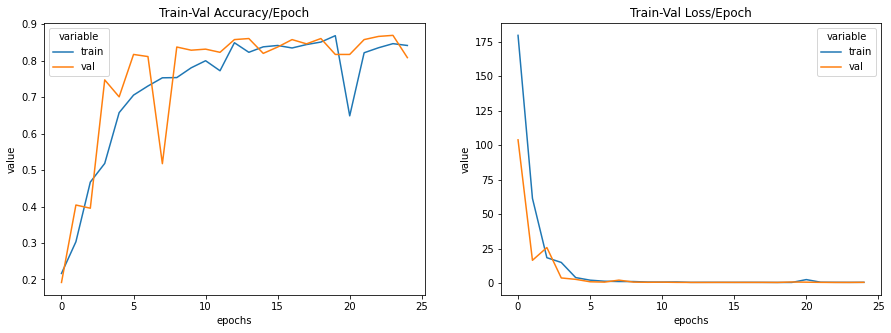

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        80
           1       0.92      0.89      0.91        91
           2       0.91      0.90      0.90        58
           3       0.69      0.87      0.77        61
           4       0.78      0.65      0.71        54

    accuracy                           0.85       344
   macro avg       0.84      0.84      0.84       344
weighted avg       0.86      0.85      0.85       344

Confusion matrix on testset:
            pred: 14  pred: 25  pred: 2662  pred: 4949  pred: 5620
true: 14          71         1           3           5           0
true: 25           0        81           0           6           4
true: 2662         2         1          52           1           2
true: 4949         2         1           1          53           4
true: 5620         2         4           1          12          35


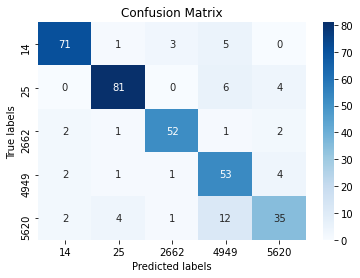

In [6]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                     model_name = 'Customized_CNN', 
                                                     batch_size = 32,  
                                                     optimizer = 'Adam', 
                                                     learning_rate = 0.008, 
                                                     lr_decay = False, 
                                                     num_epochs = 25)


### Fine-tune a pre-trained model

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 0.54193 | Val Loss: 0.25616 | Train Acc: 0.831| Val Acc: 0.951
Epoch 02: | Train Loss: 0.32497 | Val Loss: 0.27139 | Train Acc: 0.923| Val Acc: 0.948
Epoch 03: | Train Loss: 0.33782 | Val Loss: 0.25244 | Train Acc: 0.918| Val Acc: 0.945
Epoch 04: | Train Loss: 0.33654 | Val Loss: 0.26056 | Train Acc: 0.916| Val Acc: 0.942
Epoch 05: | Train Loss: 0.34677 | Val Loss: 0.26150 | Train Acc: 0.909| Val Acc: 0.939
Epoch 06: | Train Loss: 0.36062 | Val Loss: 0.25501 | Train Acc: 0.909| Val Acc: 0.951
Epoch 07: | Train Loss: 0.35111 | Val Loss: 0.25064 | Train Acc: 0.906| Val Acc: 0.945
Epoch 08: | Train Loss: 0.33142 | Val Loss: 0.28491 | Train Acc: 0.915| Val Acc: 0.945
Epoch 09: | Train Loss: 0.32974 | Val Loss: 0.25157 | Train Acc: 0.916| Val Ac

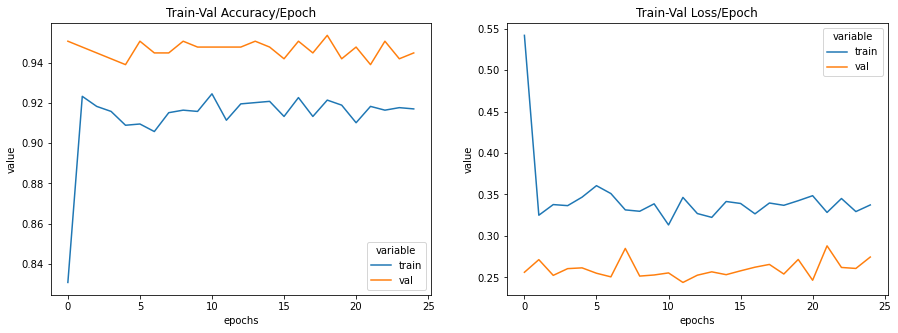

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        80
           1       0.98      0.98      0.98        91
           2       0.91      0.91      0.91        58
           3       0.98      0.97      0.98        61
           4       0.85      0.87      0.86        54

    accuracy                           0.94       344
   macro avg       0.94      0.94      0.94       344
weighted avg       0.94      0.94      0.94       344

Confusion matrix on testset:
            pred: 14  pred: 25  pred: 2662  pred: 4949  pred: 5620
true: 14          76         1           0           0           3
true: 25           2        89           0           0           0
true: 2662         0         0          53           0           5
true: 4949         2         0           0          59           0
true: 5620         0         1           5           1          47


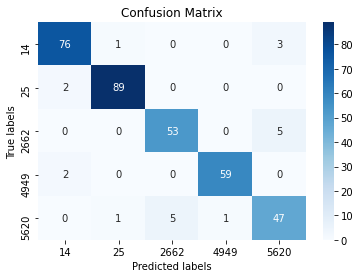

In [6]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                 model_name = 'Densenet121', 
                                                 batch_size = 32, 
                                                 pretrained = True, 
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.0005, 
                                                 lr_decay = True, 
                                                 num_epochs = 25)


Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 0.54233 | Val Loss: 0.30801 | Train Acc: 0.815| Val Acc: 0.916
Epoch 02: | Train Loss: 0.30537 | Val Loss: 0.29787 | Train Acc: 0.915| Val Acc: 0.916
Epoch 03: | Train Loss: 0.32532 | Val Loss: 0.30130 | Train Acc: 0.914| Val Acc: 0.922
Epoch 04: | Train Loss: 0.32024 | Val Loss: 0.29561 | Train Acc: 0.914| Val Acc: 0.930
Epoch 05: | Train Loss: 0.30439 | Val Loss: 0.31150 | Train Acc: 0.913| Val Acc: 0.910
Epoch 06: | Train Loss: 0.31204 | Val Loss: 0.28726 | Train Acc: 0.919| Val Acc: 0.916
Epoch 07: | Train Loss: 0.31534 | Val Loss: 0.29162 | Train Acc: 0.916| Val Acc: 0.924
Epoch 08: | Train Loss: 0.31779 | Val Loss: 0.29922 | Train Acc: 0.919| Val Acc: 0.919
Epoch 09: | Train Loss: 0.32997 | Val Loss: 0.29271 | Train Acc: 0.902| Val Ac

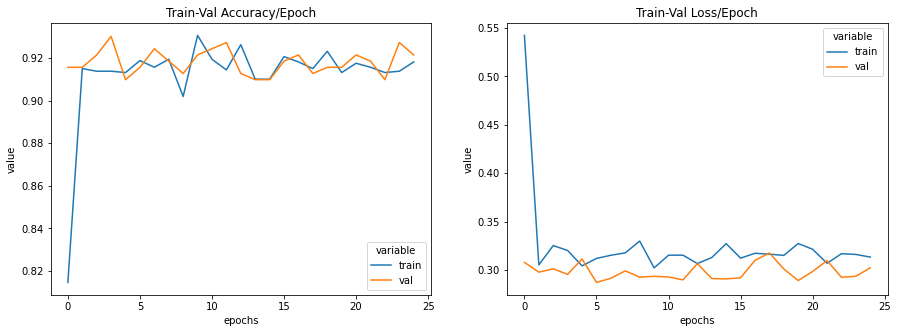

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        80
           1       0.97      0.99      0.98        91
           2       0.87      0.93      0.90        58
           3       0.96      0.90      0.93        61
           4       0.89      0.78      0.83        54

    accuracy                           0.92       344
   macro avg       0.92      0.91      0.92       344
weighted avg       0.92      0.92      0.92       344

Confusion matrix on testset:
            pred: 14  pred: 25  pred: 2662  pred: 4949  pred: 5620
true: 14          77         1           0           0           2
true: 25           0        90           0           0           1
true: 2662         2         0          54           0           2
true: 4949         5         0           1          55           0
true: 5620         1         2           7           2          42


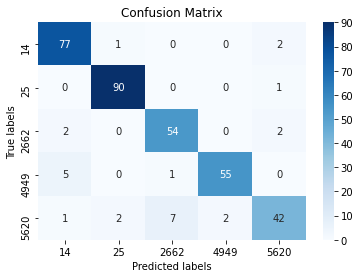

In [7]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                 model_name = 'Densenet121', 
                                                 batch_size = 32, 
                                                 pretrained = True, 
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.002, 
                                                 lr_decay = True, 
                                                 num_epochs = 25)
